In [5]:
import pandas as pd

In [9]:
file_path = "train.csv"

In [10]:
df = pd.read_csv(file_path)

In [11]:
df.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [12]:
description_path = "data_description.txt"

In [13]:
with open(description_path, 'r') as file:
    description = file.read()

In [14]:
print(description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

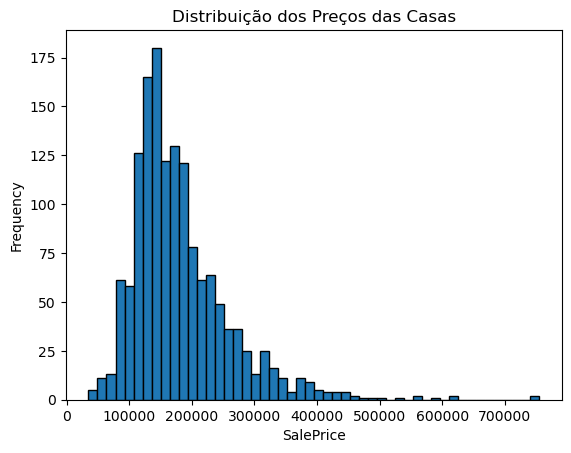

In [23]:
df['SalePrice'].plot(kind='hist', bins=50, title='Distribuição dos Preços das Casas', edgecolor='black')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [33]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

In [35]:
print("\nValores faltantes (coluna)")
print(missing_values)


Valores faltantes (coluna)
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [38]:
import numpy as np

In [39]:
df_numeric = df.select_dtypes(include=[np.number])

In [40]:
corr_matrix = df_numeric.corr()
print("\nMatriz de correlação:")
print(corr_matrix)


Matriz de correlação:
                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
To

In [41]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.fillna(df_numeric.median())

In [42]:
df_categorical = df.select_dtypes(include=[object])
df_categorical = df_categorical.fillna(df_categorical.mode().iloc[0])

In [43]:
df_categorical_dummies = pd.get_dummies(df_categorical)

In [44]:
df_numeric['HouseAge'] = df_numeric['YrSold'] - df_numeric['YearBuilt']
df_numeric['Remodeled'] = (df_numeric['YearRemodAdd'] != df_numeric['YearBuilt']).astype(int)

In [45]:
df_combined = pd.concat([df_numeric, df_categorical_dummies], axis=1)

correlation_with_target = df_combined.corr()['SalePrice'].sort_values(ascending=False)

important_features = correlation_with_target[abs(correlation_with_target) > 0.3]
important_features_list = important_features.index.tolist()

In [46]:
print("Variáveis mais importantes:")
print(important_features)

Variáveis mais importantes:
SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
BsmtQual_Ex              0.553105
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
MasVnrArea               0.472614
Fireplaces               0.466929
GarageYrBlt              0.466754
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleType_New             0.357509
SaleCondition_Partial    0.352060
LotFrontage              0.334771
MasVnrType_Stone         0.330476
Neighborhood_NoRidge

In [60]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [61]:
_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)

In [69]:
mse = mean_squared_error(y_test, y_pred)
print(f'Erro quadrático médio: {mse}')

Erro quadrático médio: 2642483715.1941586


In [74]:
percentile_75 = df['SalePrice'].quantile(0.75)
df['HighSalePrice'] = (df['SalePrice'] > percentile_75).astype(int)

print(df['HighSalePrice'].value_counts())

X = df.drop(columns=['SalePrice', 'HighSalePrice'])
y = df['HighSalePrice']

HighSalePrice
0    1098
1     362
Name: count, dtype: int64


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

C:\Users\Bernardo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

